In [1]:
#evaluate models
#train and test


In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [3]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X,y)
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:

y_pred=logreg.predict(X)
len(y_pred)

150

In [5]:
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred)) 

#accuracy=0.96- training accuracy

0.96


In [6]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred=knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.966666666667


In [7]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)
print(metrics.accuracy_score(y,y_pred)) # best model # but training data always =1

1.0


In [8]:
#dont traain and test on same data- overfiting


In [23]:
#cross validation
#x=150x 4
#y=150
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)

#random_state=4-seed

In [25]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [29]:
# train model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)   
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [30]:
#KNN n=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.966666666667


In [31]:
#KNN n=1
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [32]:
# KNN n=5 gives best results

In [41]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

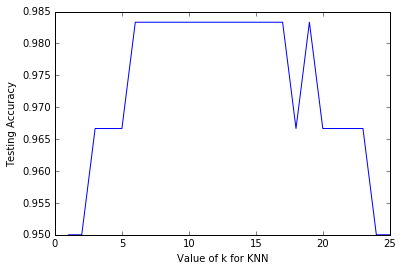

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
# plots in notebook
# plot relation between k and testing accuracy
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')